----
# Laboratorium 5 - Filtry liniowe FIR
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib`, `imageio` oraz `scipy.signal`.
### 0.2. Budowa obrazu.  
### 0.3. Filtry liniowe FIR  
- separowalność
- charakterystyki

### 0.3. Zagadnienia dotyczące analizy widmowej obrazów (wcześniejsze laboratoria).    

Literatura:
- M. Domański, Obraz cyfrowy, Wydawnictwo  WKŁ, Warszawa 2011
- D. Karwowski: Zrozumieć kompresję, Poznań 2019

In [7]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import imageio

In [8]:
#====================================================================================
# DO NOT CHANGE THE CODE DURING LABORATORIES
#====================================================================================
# good alternatives: plt.cm.coolwarm , g2D_cmapType = plt.cm.cividis g2D_cmapType = plt.cm.copper
g2D_cmapType = plt.cm.coolwarm # 
g3D_cmapType = plt.cm.coolwarm #
g_3DCharacteristics_ranges = [2,12]
# displays characteristics in 2D and 3D for given FIR filter mask
def showFilterCharacteristisc(filterMask): 
  maskFFT = np.fft.fft2(filterMask,[512,512])

  amplitude = np.fft.fftshift( np.abs(maskFFT) )
  logAmplitude =  np.log(amplitude + np.finfo(np.float64).eps) 
  phase = np.fft.fftshift( np.unwrap(np.angle(maskFFT)) )
  
  print('=======================================================================================================================')
  print('Maximum value of magnitude spectrum: %f'%(np.max(amplitude,axis=(0,1))))
  print('=======================================================================================================================')
  X = np.arange(-0.5, 0.5, 1/512)
  Y = np.arange(-0.5, 0.5, 1/512)
  X, Y = np.meshgrid(X, Y)

  fig = plt.figure(figsize=(24,16))
  ax = fig.add_subplot(2, 3, 1)
  ax.imshow(amplitude, cmap=g2D_cmapType)
  ax.set_title("Magnitude Spectrum of given FIR filter")
  ax = fig.add_subplot(2, 3, 2)
  ax.imshow(logAmplitude, cmap=g2D_cmapType)
  ax.set_title("Log Magnitude Spectrum of given FIR filter")
  ax = fig.add_subplot(2, 3, 3)
  ax.imshow(phase, cmap=g2D_cmapType)
  ax.set_title("Phase Spectrum of given FIR filter")

  ax = fig.add_subplot(2, 3, 4, projection='3d')
  ax.plot_surface(X, Y, amplitude, cmap=g3D_cmapType, linewidth=0, antialiased=False)
  ax.set_title("3D Magnitude Spectrum of given FIR filter")

  ax = fig.add_subplot(2, 3, 5, projection='3d')
  ax.plot_surface(X, Y,logAmplitude, cmap=g3D_cmapType, linewidth=0, antialiased=False)
  ax.set_title("3D Log Magnitude Spectrum of given FIR filter")

  ax = fig.add_subplot(2, 3, 6, projection='3d')
  ax.plot_surface(X, Y, phase, cmap=g3D_cmapType, linewidth=0, antialiased=False)
  ax.set_title("3D Phase Spectrum of given FIR filter")
  fig.tight_layout()
  #fig.show()

# displays given characteristics an 3D plts
def showCharacteristicsIn3D(Spectrum1,Spectrum2):
  MagMin = min(np.amin(Spectrum1), np.amin(Spectrum2))
  MagMax = max(np.amax(Spectrum1), np.amax(Spectrum2))

  X1 = np.arange(0, Spectrum1.shape[0], 1)
  Y1 = np.arange(0, Spectrum1.shape[1], 1)
  X1, Y1 = np.meshgrid(X1, Y1)

  X2 = np.arange(0, Spectrum2.shape[0], 1)
  Y2 = np.arange(0, Spectrum2.shape[1], 1)
  X2, Y2 = np.meshgrid(X2, Y2)
  
  fig = plt.figure(figsize=(18,9))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  surf = ax.plot_surface(X1, Y1, np.fft.fftshift(Spectrum1), cmap=g3D_cmapType,
                      linewidth=0, antialiased=False ,vmin=g_3DCharacteristics_ranges[0], vmax=g_3DCharacteristics_ranges[1]) #, vmin=MagMin, vmax=MagMax)
  #ax.set_zlim3d([MagMin,MagMax])
  ax.set_zlim3d(g_3DCharacteristics_ranges)
  ax.set_title("3D Spectrum 1")
  fig.colorbar(surf, shrink=0.5, aspect=5)
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  surf = ax.plot_surface(X2, Y2, np.fft.fftshift(Spectrum2), cmap=g3D_cmapType,
                      linewidth=0, antialiased=False ,vmin=g_3DCharacteristics_ranges[0], vmax=g_3DCharacteristics_ranges[1]) #, vmin=MagMin, vmax=MagMax)
  #ax.set_zlim3d([MagMin,MagMax])
  ax.set_zlim3d(g_3DCharacteristics_ranges)
  ax.set_title("3D Spectrum 2")
  fig.colorbar(surf, shrink=0.5, aspect=5)
  fig.tight_layout()
  #fig.show()
  return 

### Zadanie A:  
Wyczytaj obrazy 'lena.png' i 'boats.png'. Sprawdź rozmiary macierzy, w których przechowywane są dane oraz ich typ.  

Następnie wyświetl na jednym wykresie (`subplot` lub `subplots`) obydwa obrazy w skali szarości (argumenty $cmap$, $vmin$ i $vmax$ funkcji `imshow`).

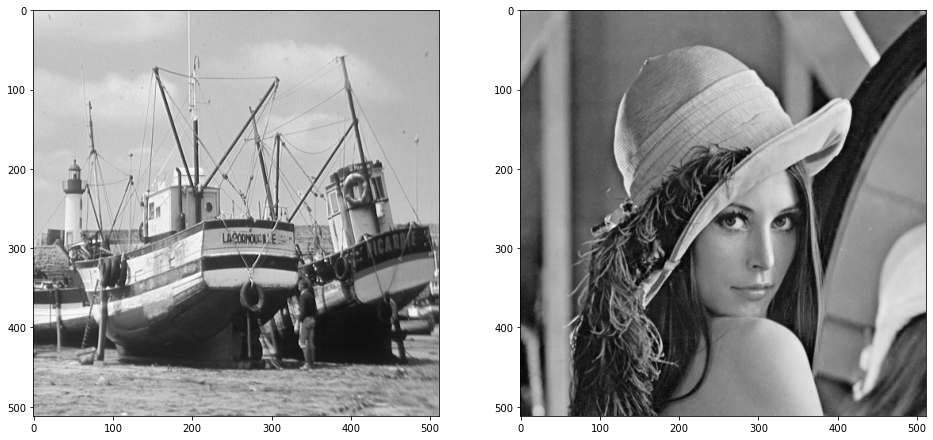

In [32]:

#load images, check dimensions and data type
boats_image = imageio.imread("boats.png")
lena_image = imageio.imread("lena.png")

#display images
fig, axs = plt.subplots(1, 2, figsize=[16,16])
axs[0].imshow(boats, cmap="gray")
axs[1].imshow(lena, cmap="gray")


### Zadanie B:  
Napisz funkcję wyświetlającą dwa obrazy oraz odpowiadające im widma amplitudowe:  
* Funkcja jako argumenty przyjmuje dwa obrazy.
* Funkcja wyznacza widmo amplitudowe obydwu obrazów (wykorzystaj funkcję `numpy.fft.fft2`).
* Funkcja wyświetla w pierwszym wierszu okna obrazy, a w drugim wierszu odpowiadające im widma amplitudowe w skali logarytmicznej (wyświetl wszystkie dane w skali szarości).  


Wskazówki:  
* Aby uniknąć problemu wyznaczania logarytmu z wartości 0, dodaj wartość `numpy.finfo(np.float64).eps` do próbek widma.  
* Aby ułatwić analizę wyznaczonych widm zastosuj, przed wyświetleniem, przesunięcie współczynnika F(0,0) na środek wyświetlanego obrazu (wykorzystaj funkcję `numpy.fft.fftshift`).

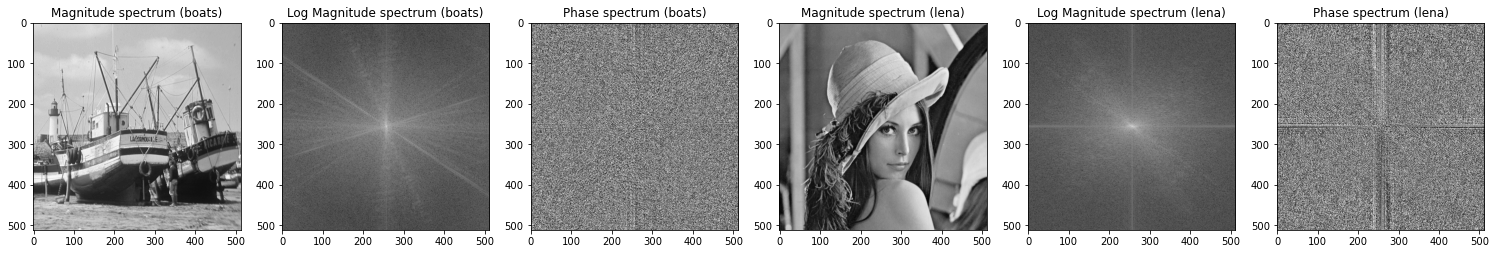

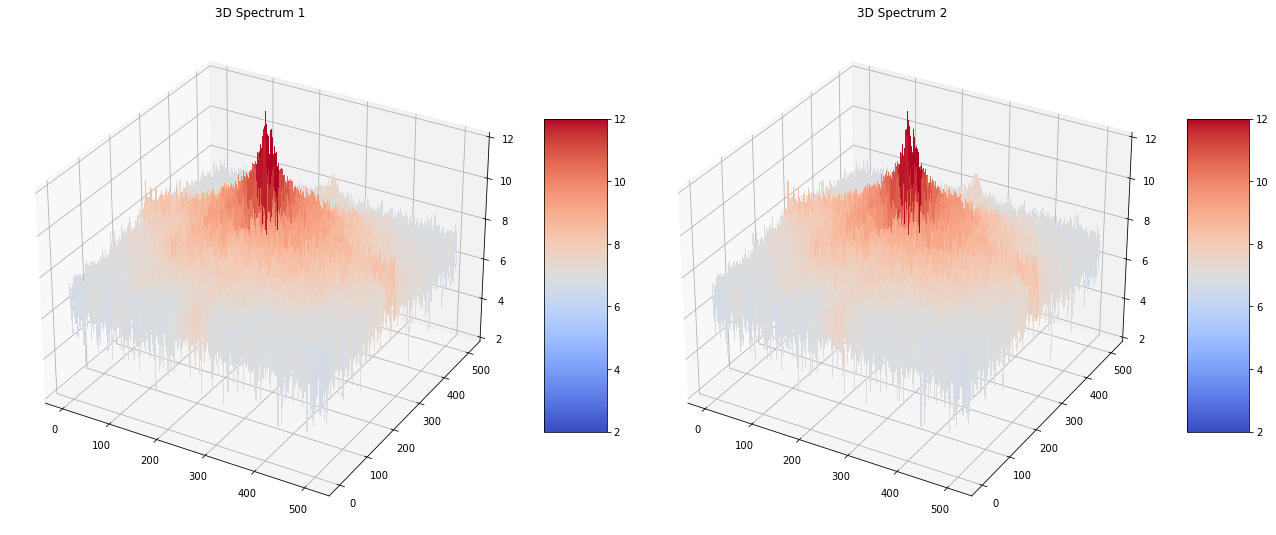

In [33]:
def displayImagesWithSpectrums(boats, lena) : 
    #calculate fourier transform - complex spectrum
    complex_spectrum_boats = np.fft.fft2(boats) + np.finfo(np.float64).eps 
    complex_spectrum_lena = np.fft.fft2(lena) + np.finfo(np.float64).eps                                
    #magnitude spectrum in logaritmic scale                            
    magnitude_boats = np.abs(complex_spectrum_boats)
    magn_log_boats = np.log(magnitude_boats) 
    magnitude_lena = np.abs(complex_spectrum_lena)
    magn_log_lena = np.log(magnitude_lena)
    phase_boats = np.angle(complex_spectrum_boats)
    phase_lena = np.angle(complex_spectrum_lena)  
    #display spectrum (boats)
    figDFT, axsDFT = plt.subplots(1, 6, figsize=[26, 14])
    axsDFT[0].imshow(boats, cmap=plt.cm.gray)
    axsDFT[0].set_title("Magnitude spectrum (boats)")
    axsDFT[1].imshow(np.fft.fftshift(magn_log_boats), cmap=plt.cm.gray)
    axsDFT[1].set_title("Log Magnitude spectrum (boats)")
    axsDFT[2].imshow(np.fft.fftshift(phase_boats), cmap=plt.cm.gray)
    axsDFT[2].set_title("Phase spectrum (boats)")
    axsDFT[3].imshow(lena, cmap=plt.cm.gray)
    axsDFT[3].set_title("Magnitude spectrum (lena)")
    axsDFT[4].imshow(np.fft.fftshift(magn_log_lena), cmap=plt.cm.gray)
    axsDFT[4].set_title("Log Magnitude spectrum (lena)")
    axsDFT[5].imshow(np.fft.fftshift(phase_lena), cmap=plt.cm.gray)
    axsDFT[5].set_title("Phase spectrum (lena)")
    #show magnitude characteristics in 3D
    #show magnitude characteristics in 3D
    showCharacteristicsIn3D(magn_log_lena, magn_log_lena)



displayImagesWithSpectrums(boats_image, lena_image)


### Zadanie C:  
Filtr uśredniający 3x3:  
* Utwórz maskę prostego dolnoprzepustowego filtru uśredniającego FIR o rozmiarze 3x3:  
`Mask = [1/9 1/9 1/9; 1/9 1/9 1/9; 1/9 1/9 1/9]`.  
* Dokonaj filtracji obrazu poprzez wyliczenie splotu oryginalnego obrazu z maską filtru używając funkcji `scipy.signal.convolve2d` i przypisz wynik do nowej zmiennej.   
* Wykorzystując funkcję z zadania B wyświetl obrazy przed i po filtrcji wraz z odpowiadającymi im widmami.
* Powtórz operacje dla kilku obrazów testowych.


Maximum value of magnitude spectrum: 1.000000


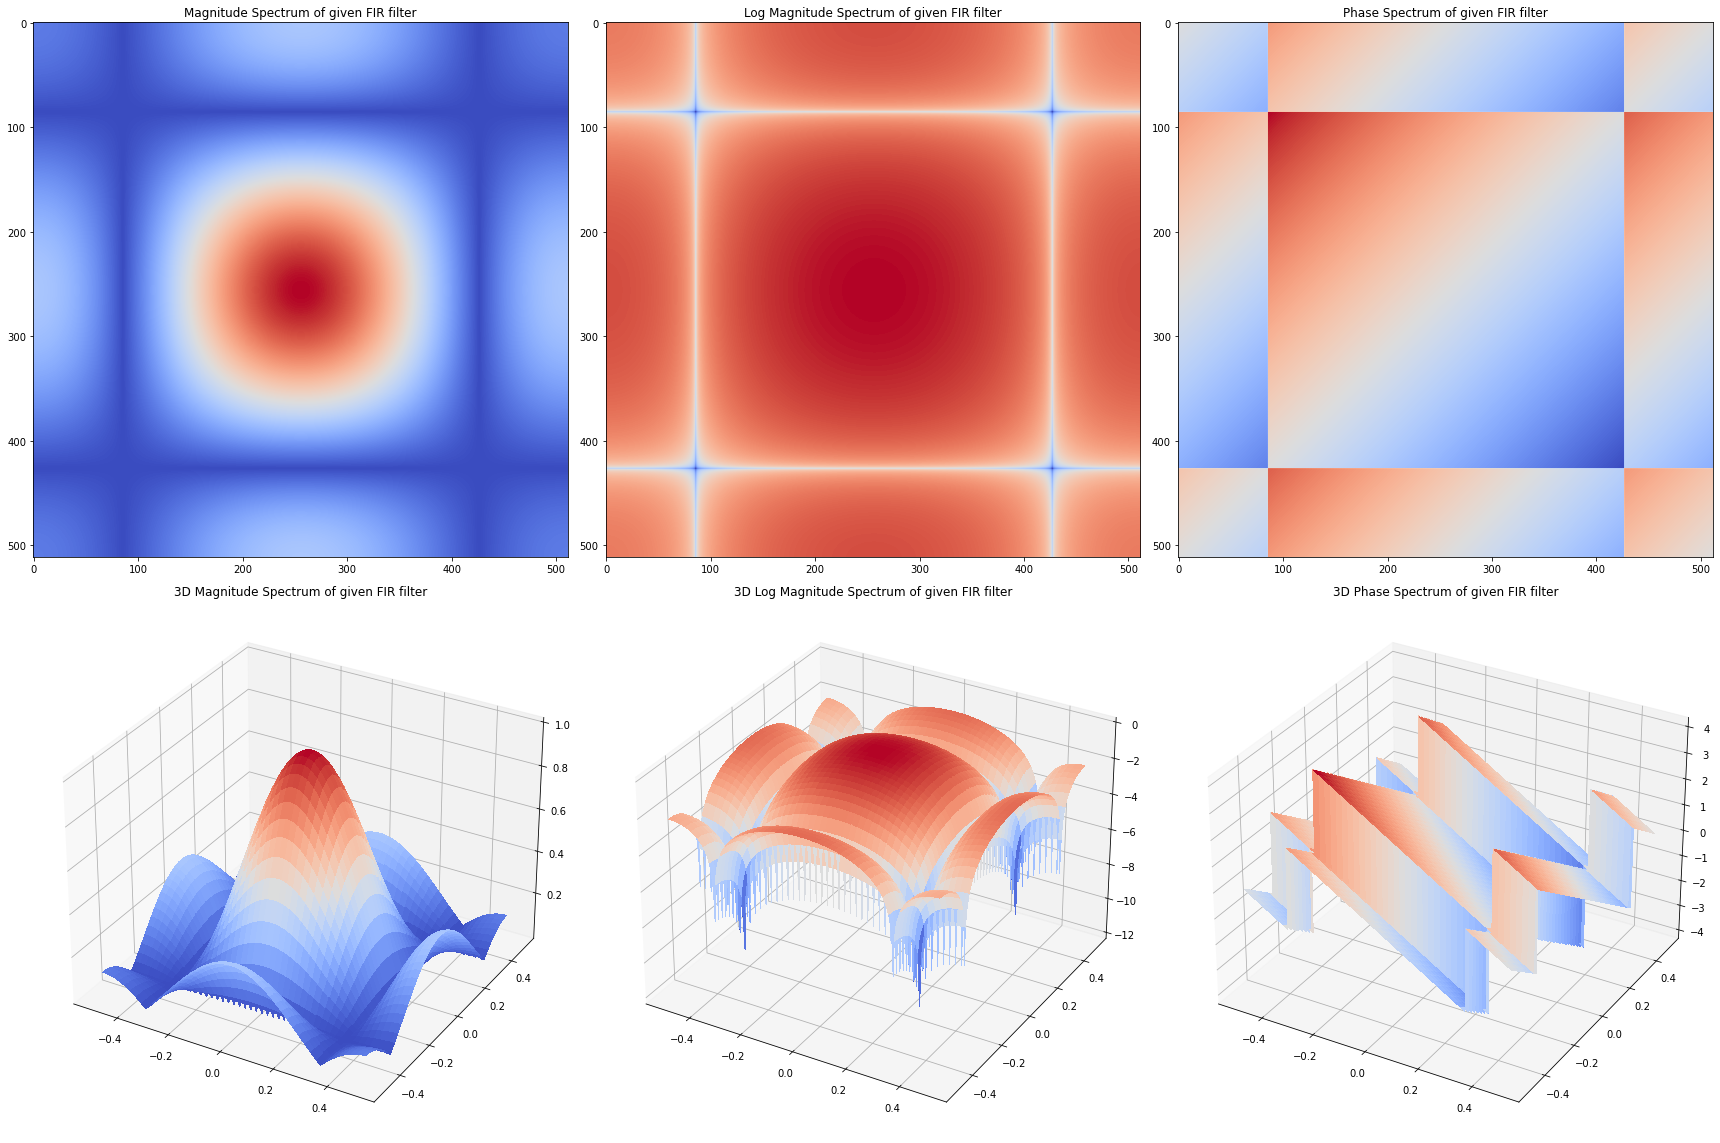

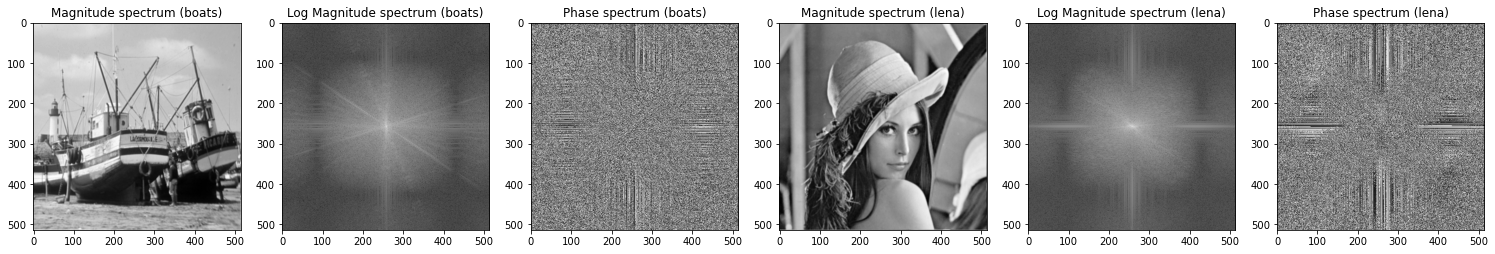

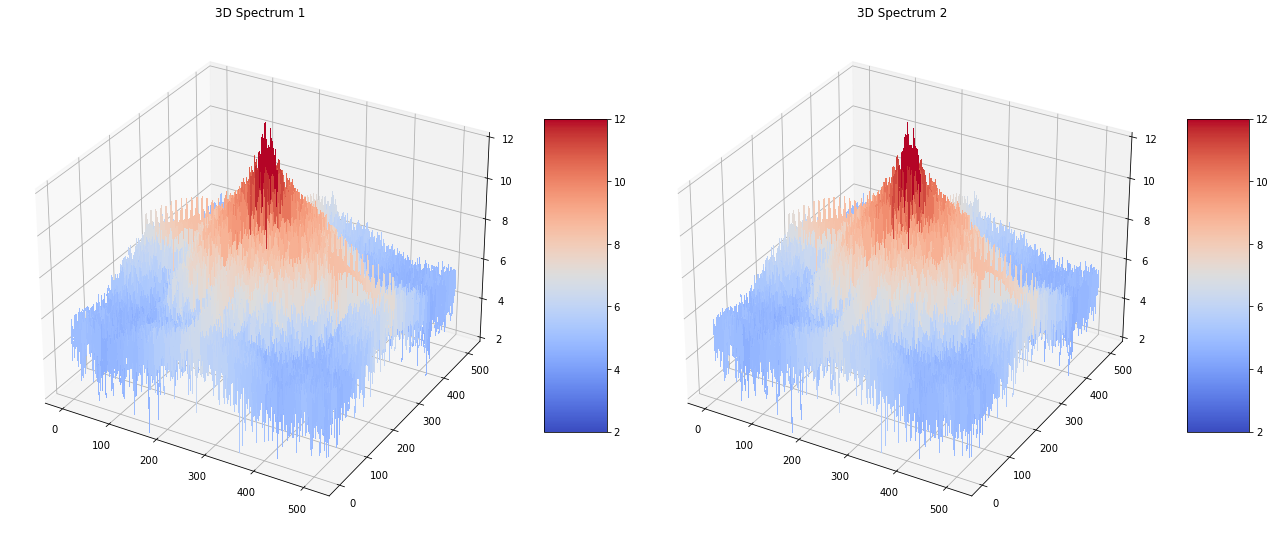

In [37]:
#define filter mask
Mask = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
#apply filter
result_boats_mean = sp.signal.convolve2d(boats_image, Mask, boundary='wrap') # parametr wrap jest WAŻNY, żeby się wynik zgadzał
result_boats_mean = result_boats_mean.round().clip(0,255).astype(np.uint8) # zaokrąglenia (ważne, innaczej nie działa)
result_lena_mean = sp.signal.convolve2d(lena_image, Mask, boundary='wrap')
result_lena_mean = result_lena_mean.round().clip(0,255).astype(np.uint8)
#show filter characteristic, display result
showFilterCharacteristisc(Mask)
displayImagesWithSpectrums(result_boats_mean, result_lena_mean)



### Zadanie D:   
Filtr separowalny 7x7:  
* Utwórz maskę dolnoprzepustowego separowalnego filtru FIR o rozmiarze 7x7:  
`Mask1D = [-29/256 0 88/256 138/256 88/256 0 -29/256]`.  
`Mask2D = Mask1D’*Mask1D`. (symbol `’` oznacza transpozycję macierzy).

* Dokonaj filtracji obrazu przez wyliczenie splotu oryginalnego obrazu z maską filtru 7x7 (Mask2D) i oceń efekty (użyj `scipy.ndimage.convolve` oraz funkcji do rysowania z zadania B).   
* Dokonaj filtracji obrazu przez wyliczenie splotu oryginalnego obrazu z maską poziomą 1x7 (`Mask1D`) a następnie na otrzymanym wyniku zastosuj splot z maską pionową 7x1 (`Mask1D’`).   

* Porównaj efekty osobnego filtrowania z użyciem masek 1x7 i 7x1 z filtracją za pomocą maski 7x7.  
* Powtórz operacje dla kilku obrazów testowych.

Wskazówka:
`Python` nie rozróżnia wektorów wierszowych od kolumnowych, dlatego funkcja `numpy.transpose` nie zadziała na wektorze. Do transpozycji wektora `Mask1D` można wykorzystać np. `Mask1D.T` lub `Mask1D.reshape((-1, 1))`.  

Maximum value of magnitude spectrum: 1.185402


ValueError: shape mismatch: objects cannot be broadcast to a single shape

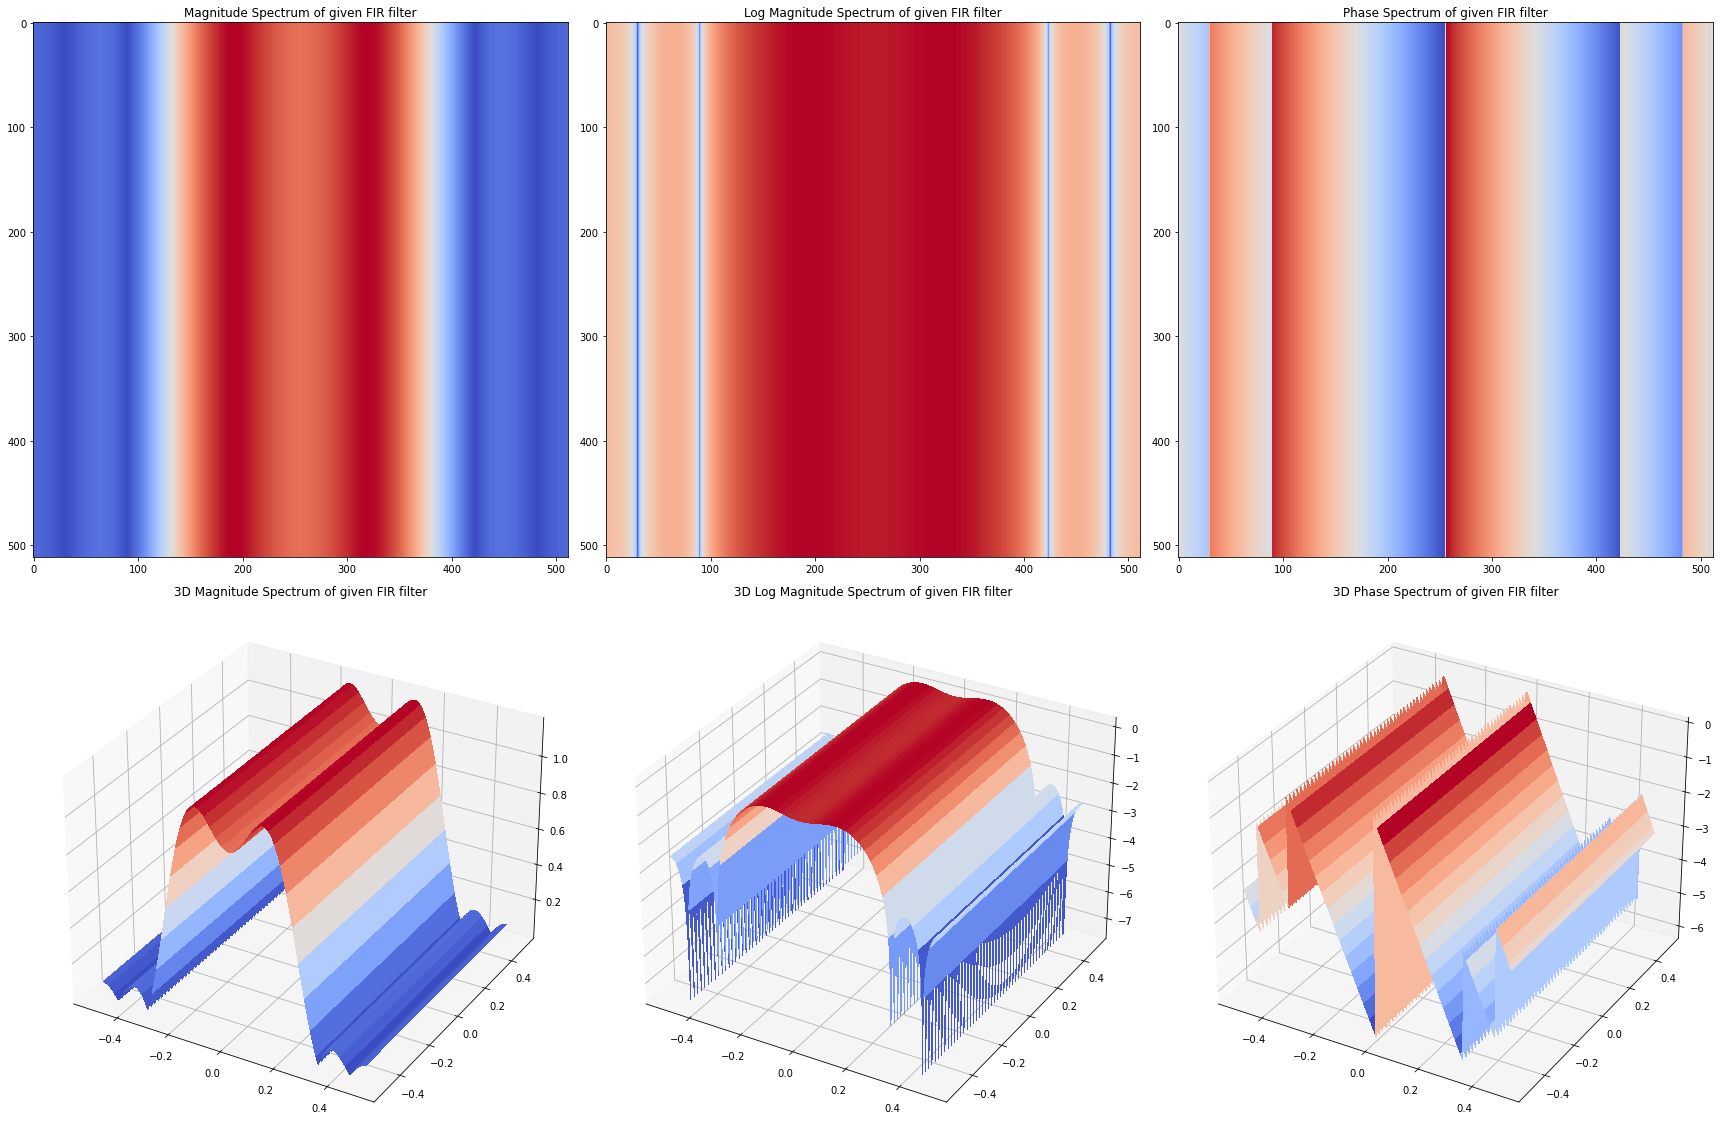

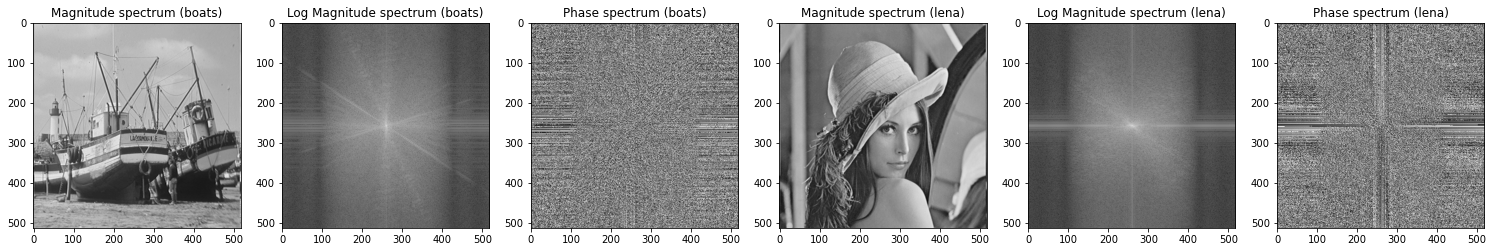

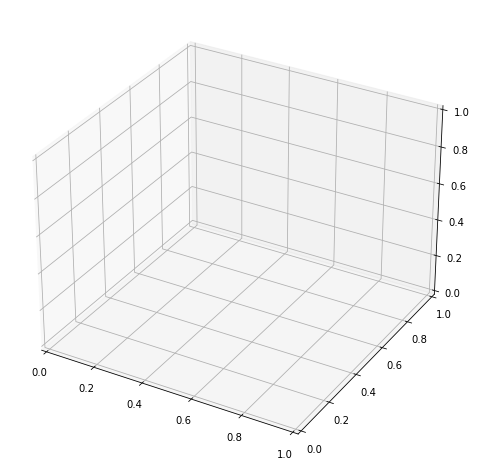

In [46]:
# define Mask1D
Mask1D = [-29/256, 0, 88/256, 138/256, 88/256, 0, -29/256]
Mask1D = np.reshape(Mask1D, (1,7))

# define transposed Mask1D - Mask1D’
Mask1DT = np.transpose(Mask1D)

# define Mask2D
Mask2D = Mask1DT * Mask1D

#1D
#filter images - convolution
result_boats_mean = sp.signal.convolve2d(boats_image, Mask1D, boundary='wrap') # parametr wrap jest WAŻNY, żeby się wynik zgadzał
result_boats_mean = result_boats_mean.round().clip(0,255).astype(np.uint8) # zaokrąglenia (ważne, innaczej nie działa)
result_lena_mean = sp.signal.convolve2d(lena_image, Mask1D, boundary='wrap')
result_lena_mean = result_lena_mean.round().clip(0,255).astype(np.uint8)
#show filter characteristic, display result
showFilterCharacteristisc(Mask1D)
displayImagesWithSpectrums(result_boats_mean, result_lena_mean)

#1DT
result_boats_mean = sp.signal.convolve2d(boats_image, Mask1DT, boundary='wrap') # parametr wrap jest WAŻNY, żeby się wynik zgadzał
result_boats_mean = result_boats_mean.round().clip(0,255).astype(np.uint8) # zaokrąglenia (ważne, innaczej nie działa)
result_lena_mean = sp.signal.convolve2d(lena_image, Mask1DT, boundary='wrap')
result_lena_mean = result_lena_mean.round().clip(0,255).astype(np.uint8)
#show filter characteristic, display result
showFilterCharacteristisc(Mask1DT)
displayImagesWithSpectrums(result_boats_mean, result_lena_mean)

#2D
result_boats_mean = sp.signal.convolve2d(boats_image, Mask2D, boundary='wrap') # parametr wrap jest WAŻNY, żeby się wynik zgadzał
result_boats_mean = result_boats_mean.round().clip(0,255).astype(np.uint8) # zaokrąglenia (ważne, innaczej nie działa)
result_lena_mean = sp.signal.convolve2d(lena_image, Mask2D, boundary='wrap')
result_lena_mean = result_lena_mean.round().clip(0,255).astype(np.uint8)
#show filter characteristic, display result
showFilterCharacteristisc(Mask2D)
displayImagesWithSpectrums(result_boats_mean, result_lena_mean)



#display result - spectrums


#compare results - sample-wise
#check if separable filter is correct


### Zadanie E:  
Filtr górnoprzepustowy 3x3:  
* Utwórz maskę prostego górnoprzepustowego filtru FIR o rozmiarze 3x3:  
`Mask = [-1 -1 -1; -1 8 -1; -1 -1 -1];`  
* Dokonaj filtracji poprzez wyliczenie splotu oryginalnego obrazu z maską filtru używając funkcji `scipy.signal.convolve2d` i przypisz wynik do nowej zmiennej.  
* Wykorzystując funkcję z zadania B wyświetl obrazy przed i po filtrcji wraz z odpowiadającymi im widmami.
* Powtórz operacje dla kilku obrazów testowych.


Maximum value of magnitude spectrum: 12.000000


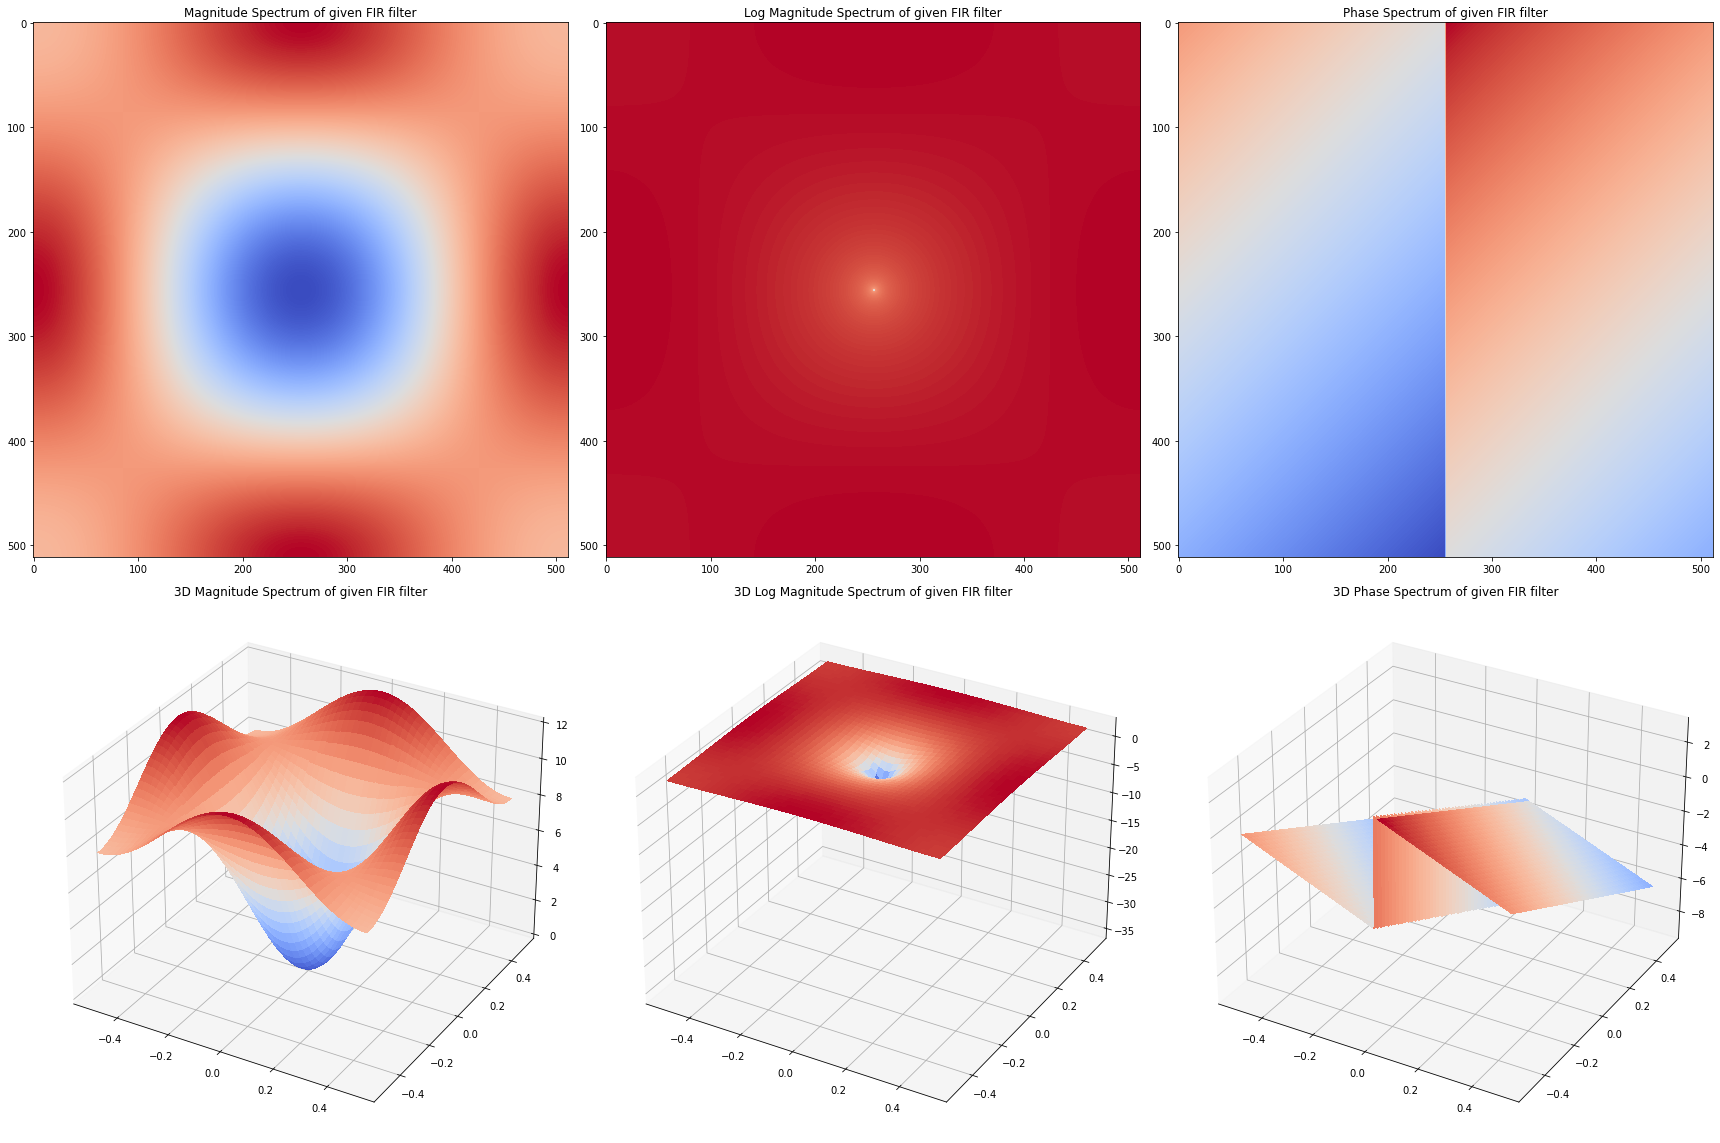

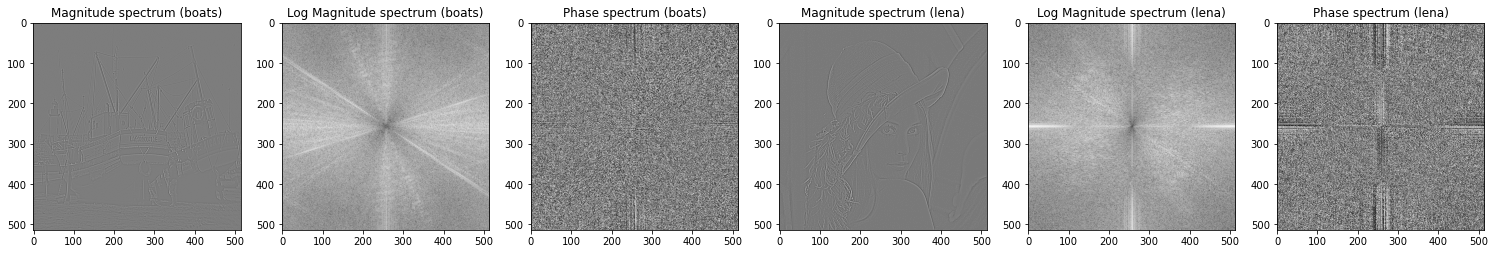

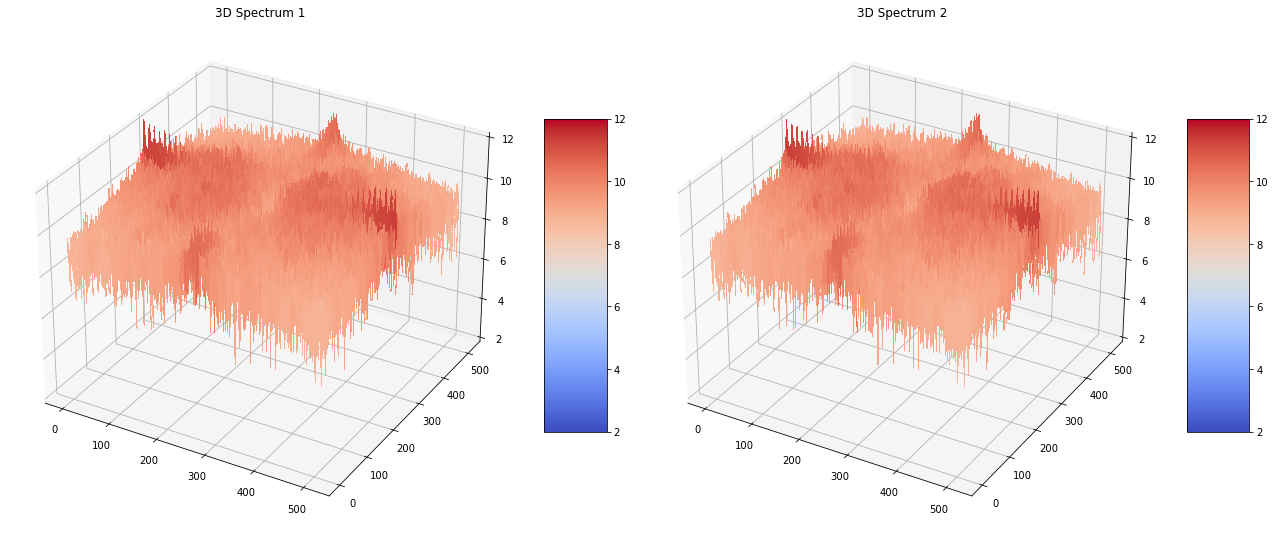

In [48]:
#define filter mask - Maska krawędzi obrazu
Mask = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
#apply filter
result_boats_mean = sp.signal.convolve2d(boats_image, Mask, boundary='wrap') # parametr wrap jest WAŻNY, żeby się wynik zgadzał
#result_boats_mean = result_boats_mean.round().clip(0,255).astype(np.uint8) # zaokrąglenia (ważne, innaczej nie działa)
result_lena_mean = sp.signal.convolve2d(lena_image, Mask, boundary='wrap')
#result_lena_mean = result_lena_mean.round().clip(0,255)
#show filter characteristic, display result
showFilterCharacteristisc(Mask)
displayImagesWithSpectrums(result_boats_mean, result_lena_mean)



### Zadanie F:  
Filtr wykrywający krawędzie 3x3:  
* Utwórz maskę prostego filtru FIR wykrywającego krawędzie o rozmiarze 3x3:  
`Mask = [-1 0 1; -2 0 2; -1 0 1]`;
* Dokonaj filtracji poprzez wyliczenie splotu oryginalnego obrazu z maską filtru używając funkcji `scipy.signal.convolve2d` i przypisz wynik do nowej zmiennej.  
* Wykorzystując funkcję z zadania B wyświetl obrazy przed i po filtrcji wraz z odpowiadającymi im widmami.
* Powtórz operacje dla kilku obrazów testowych.


Maximum value of magnitude spectrum: 8.000000


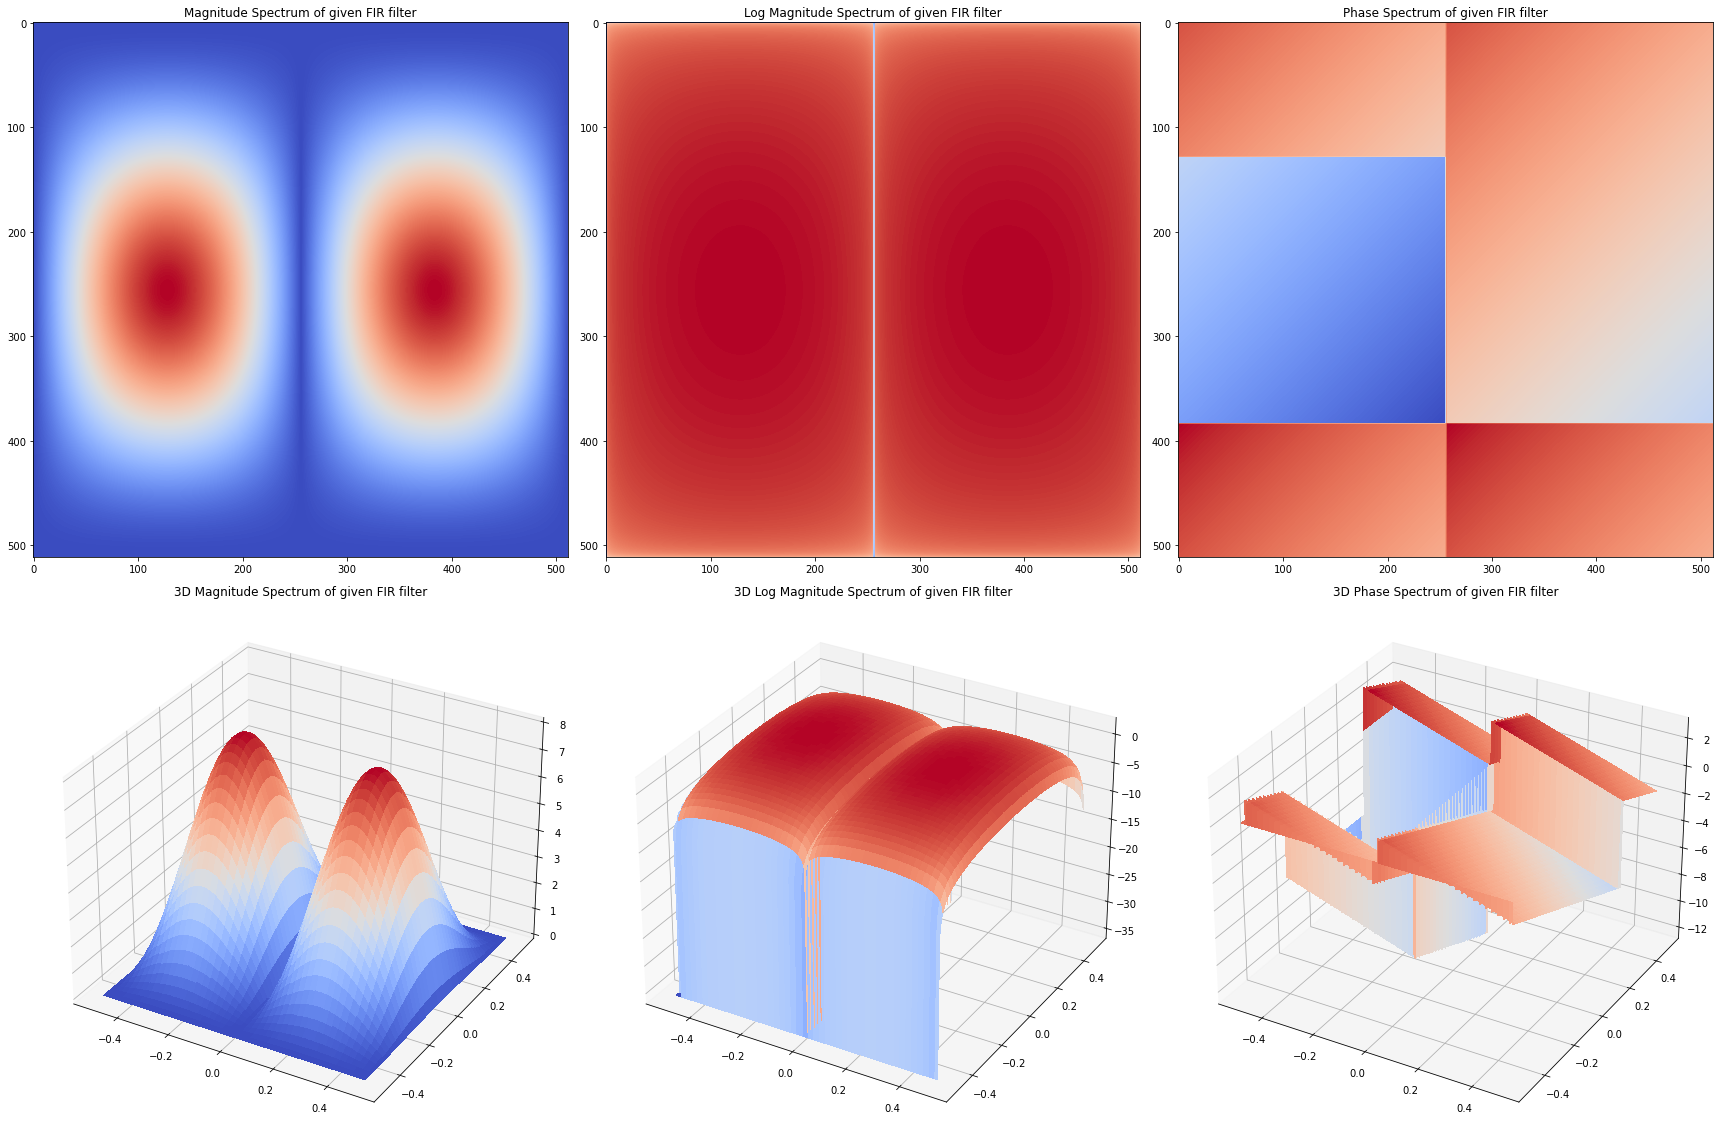

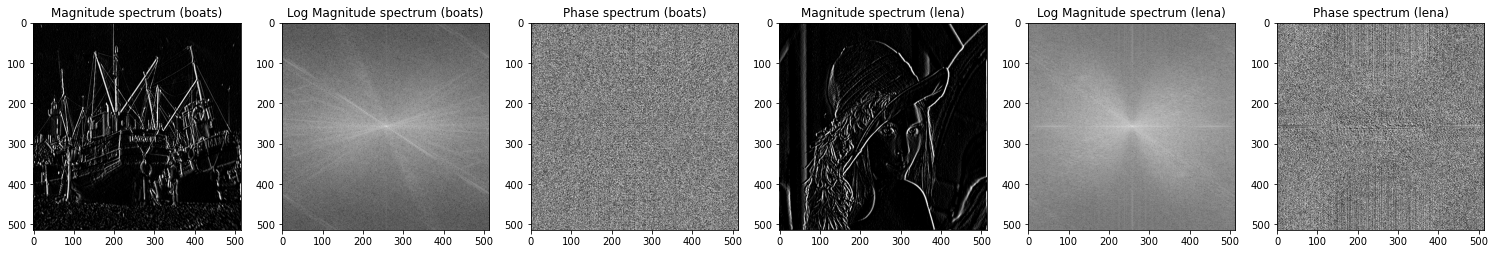

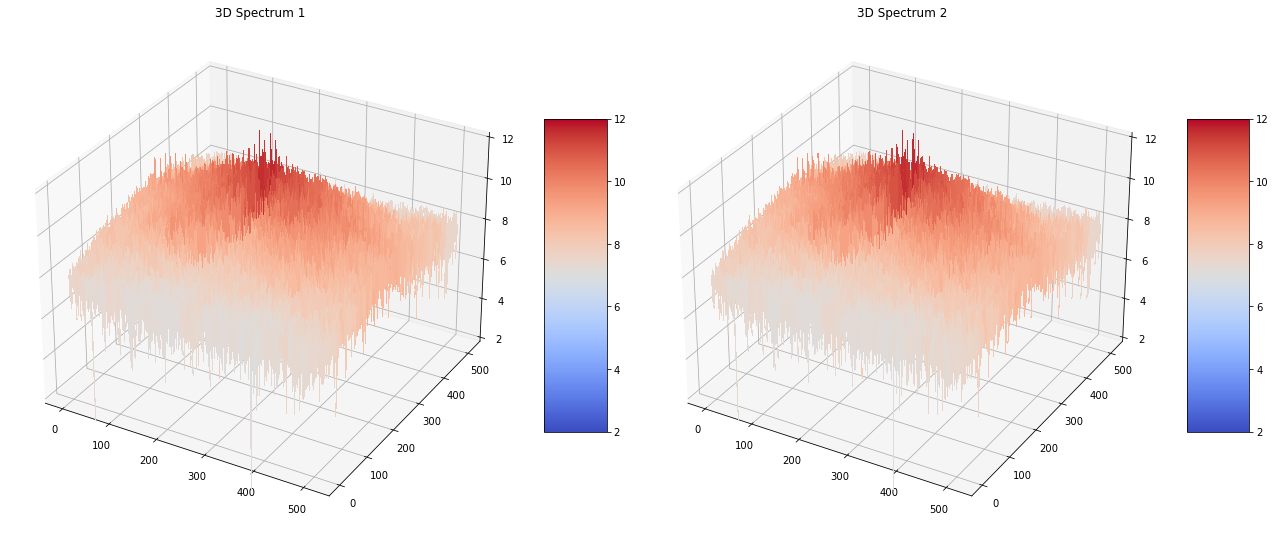

In [45]:
#define filter mask
Mask = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#apply filter
result_boats_mean = sp.signal.convolve2d(boats_image, Mask, boundary='wrap') # parametr wrap jest WAŻNY, żeby się wynik zgadzał
result_boats_mean = result_boats_mean.round().clip(0,255).astype(np.uint8) # zaokrąglenia (ważne, innaczej nie działa)
result_lena_mean = sp.signal.convolve2d(lena_image, Mask, boundary='wrap')
result_lena_mean = result_lena_mean.round().clip(0,255).astype(np.uint8)
#show filter characteristic, display result
showFilterCharacteristisc(Mask)
displayImagesWithSpectrums(result_boats_mean, result_lena_mean)

### Zadanie G:  
Własne filtry:  
* Utwórz maski dolnoprzepustowych filtrów uśredniających FIR o rozmiarze 5x5, 7x7, 9x9 i 11x11.
* Dokonaj filtracji poprzez wyliczenie splotu oryginalnego obrazu z maską filtru używając funkcji `scipy.signal.convolve2d` i przypisz wynik do nowej zmiennej.  
* Wykorzystując funkcję z zadania B wyświetl obrazy przed i po filtrcji wraz z odpowiadającymi im widmami.
* Wyciągnij wnioski

In [ ]:
# define filter mask
Mask

#show filter characteristic 
showFilterCharacteristisc(Mask)

#apply filter


#display results

